In [3]:
# Importaciones necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Crimes_-_2015_20250305.csv")

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  
correlacion = df.corr()


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264867 entries, 0 to 264866
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    264867 non-null  int64  
 1   Case Number           264867 non-null  int64  
 2   Date                  264867 non-null  int64  
 3   Block                 264867 non-null  int64  
 4   IUCR                  264867 non-null  int64  
 5   Primary Type          264867 non-null  int64  
 6   Description           264867 non-null  int64  
 7   Location Description  264867 non-null  int64  
 8   Arrest                264867 non-null  bool   
 9   Domestic              264867 non-null  bool   
 10  Beat                  264867 non-null  int64  
 11  District              264867 non-null  int64  
 12  Ward                  264865 non-null  float64
 13  Community Area        264867 non-null  int64  
 14  FBI Code              264867 non-null  int64  
 15  

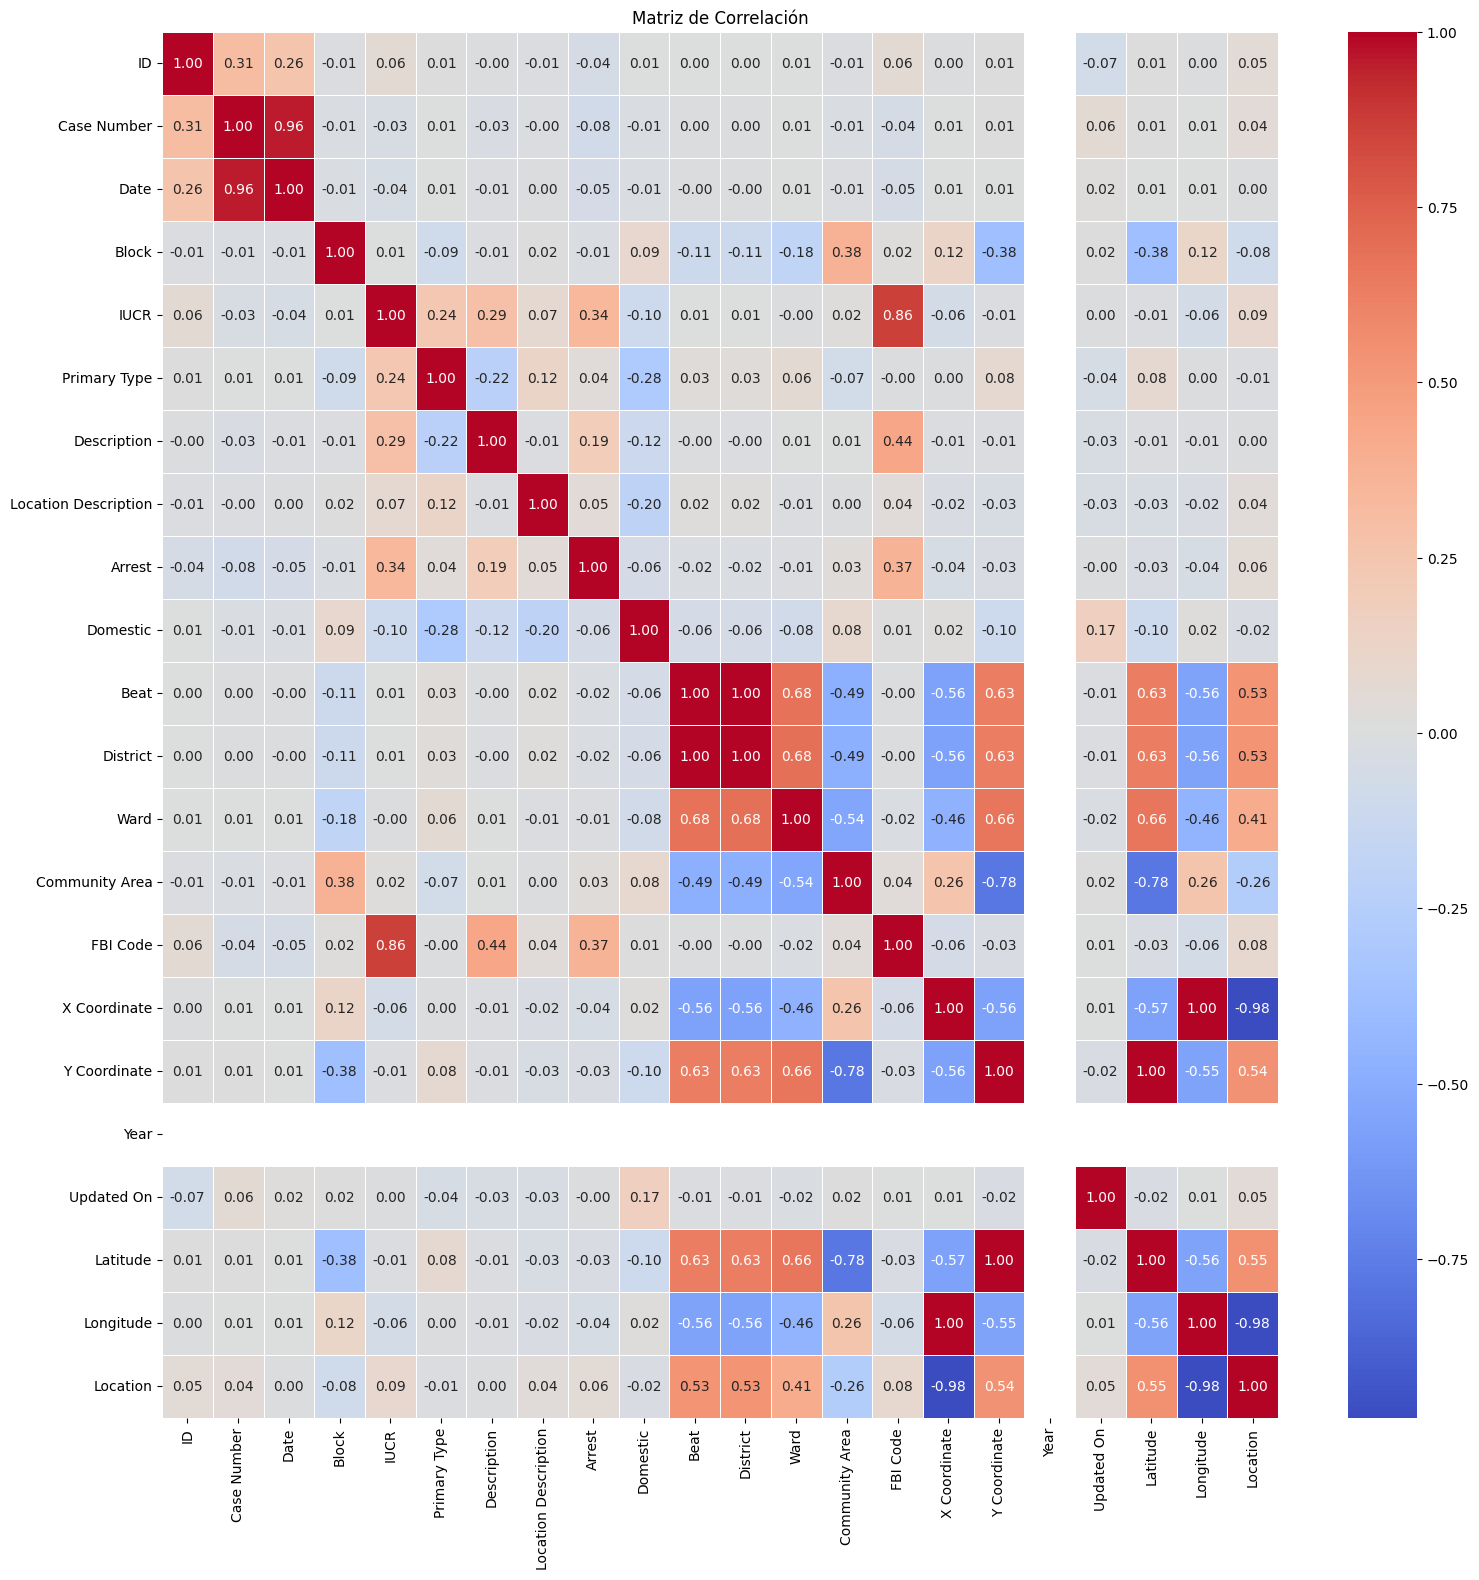

In [5]:

plt.figure(figsize=(18,18))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[["District"]]  # Reemplaza con la variable con mayor correlación
y = df["Beat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, R²: {r2}")


RMSE: 20.095726766340007, R²: 0.9991595454031091


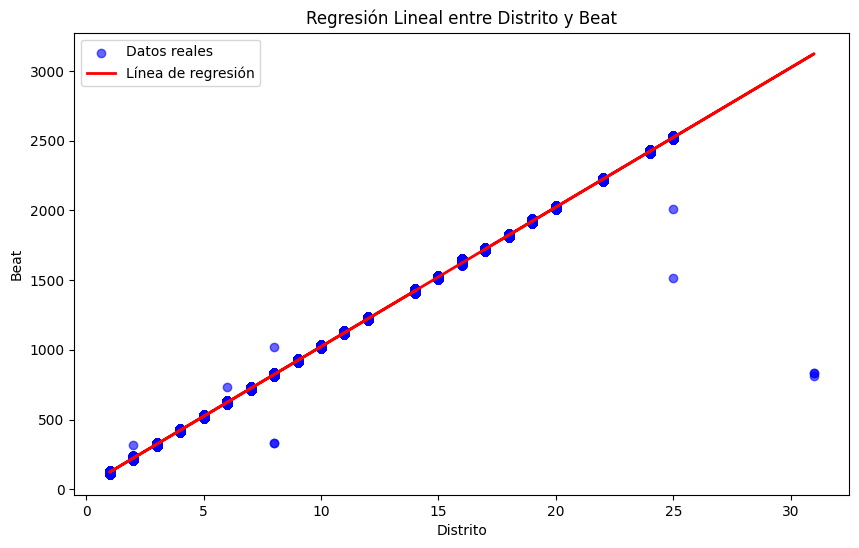

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.scatter(X_test, y_test, color='blue', label='Datos reales', alpha=0.6)


plt.plot(X_test, y_pred, color='red', label='Línea de regresión', linewidth=2)

plt.xlabel('Distrito')
plt.ylabel('Beat')
plt.title('Regresión Lineal entre Distrito y Beat')
plt.legend()

plt.show()